In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import matplotlib.pyplot as plt

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
import kagglehub
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")
print("Path to dataset files:", path)

DATA_DIR = os.path.join(
    path,
    "PetImages"
)

Path to dataset files: C:\Users\ADMIN\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1


In [44]:
loaded_model = keras.models.load_model("PetImages.h5")
loaded_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,356 (2.61 MB)

 Trainable params: 683,906 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [45]:
IMG_SIZE = 64
BATCH_SIZE = 128

In [46]:
datagen = ImageDataGenerator(
    rescale=1./255, # chuyen doi gtri [0,255] ve [0,1]
    validation_split=0.2 # Chia du lieu thanh 80% train va 20% validation
)
train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode="categorical",
    subset="training" # chi dinh lay tap train
)

class_names = train_data.class_indices
class_names = dict((v,k)for k,v in class_names.items()) # Dao nguoc key value
print(class_names)

Found 20000 images belonging to 2 classes.
{0: 'Cat', 1: 'Dog'}


In [47]:
from glob import glob
# Di qua tat ca file trong thu muc test
test_images = glob(os.path.join(path, "PetImages", "Cat", "*.jpg"))
test_images[:5] # In ra 5 file dau tien

['C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Cat\\0.jpg',
 'C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Cat\\1.jpg',
 'C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Cat\\10.jpg',
 'C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Cat\\100.jpg',
 'C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Cat\\1000.jpg']

In [48]:
from glob import glob
# Di qua tat ca file trong thu muc test
test_images = glob(os.path.join(path, "PetImages", "Dog", "*.jpg"))
test_images[:5] # In ra 5 file dau tien

['C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Dog\\0.jpg',
 'C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Dog\\1.jpg',
 'C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Dog\\10.jpg',
 'C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Dog\\100.jpg',
 'C:\\Users\\ADMIN\\.cache\\kagglehub\\datasets\\bhavikjikadara\\dog-and-cat-classification-dataset\\versions\\1\\PetImages\\Dog\\1000.jpg']

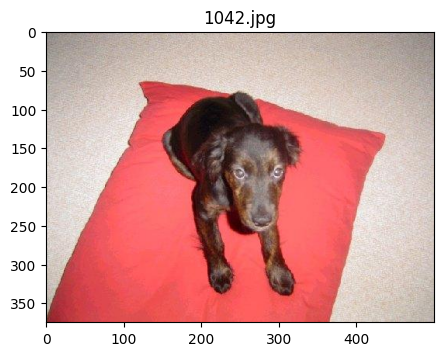

In [57]:
# ve hinh anh
import cv2
test_img_path = test_images[470]
img = cv2.imread(test_img_path)
plt.rcParams['figure.figsize'] = [5,5]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(test_img_path.split("\\")[-1])
plt.show()

In [58]:
# Du doan hinh
img = image.load_img(test_img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = img_array/255.0 # sccale anh
img_array = np.expand_dims(img_array, axis=0) # them kick thuoc batch

# du doan hinh
predictions = loaded_model.predict(img_array)
print(predictions)
predicted_class = np.argmax(predictions, axis=1)[0]
print("Predicted class index: ", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.5005668  0.49943325]]
Predicted class index:  Cat


In [59]:
# Dự đoán
prediction = loaded_model.predict(img_array)
# Không cần gọi tf.nn.softmax nếu lớp cuối của mô hình đã là softmax
predicted_probs = prediction[0] 

# Lấy top 2 kết quả
top_2_indices = np.argsort(predicted_probs)[-2:]
top_1_prob = predicted_probs[top_2_indices[1]]
top_2_prob = predicted_probs[top_2_indices[0]]

PROBABILITY_GAP = 0.15 

if top_1_prob < 0.55 or (top_1_prob - top_2_prob) < PROBABILITY_GAP:
    print("ERROR: Ambiguous or invalid image!")
    print(f"Top prediction: {top_1_prob*100:.2f}%, Second: {top_2_prob*100:.2f}%")
else:
    label = class_names[top_2_indices[1]]
    print(f"Predicted label: {label} ({top_1_prob*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ERROR: Ambiguous or invalid image!
Top prediction: 50.06%, Second: 49.94%
